# 맷플롯립의 고급 기능 익히기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-da/blob/main/05-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시작하기 전에

이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 컴퓨터에 나눔 폰트가 없다면 설치해 주세요.

__주의: 코랩에서 실행하는 경우 아래 셀을 실행하고 메뉴에서 <런타임> → <런타임 다시 시작>을 눌러 런타임을 재시작해 주세요.__

In [1]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [2]:
import gdown

gdown.download('https://bit.ly/nsbook7', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/nsbook7
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 192MB/s]


'ns_book7.csv'

In [3]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

## pyplot vs 객체지향 API

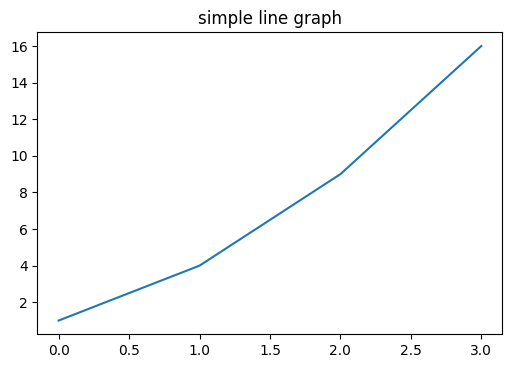

In [5]:
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

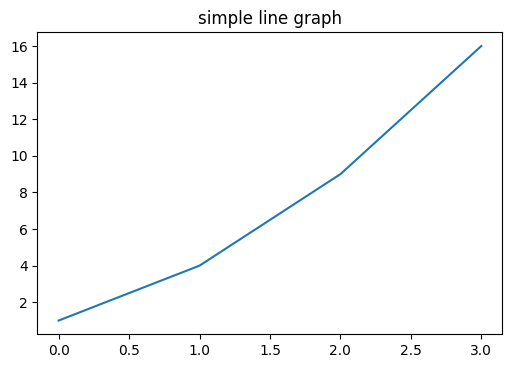

In [6]:
fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 한글 출력하기

In [7]:
plt.rcParams['font.family']

['sans-serif']

In [8]:
# 나눔고딕 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'

In [9]:
# 위와 동일하지만 이번에는 나눔바른고딕 폰트로 설정합니다.
plt.rc('font', family='NanumBarunGothic')

In [10]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [11]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


In [12]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr

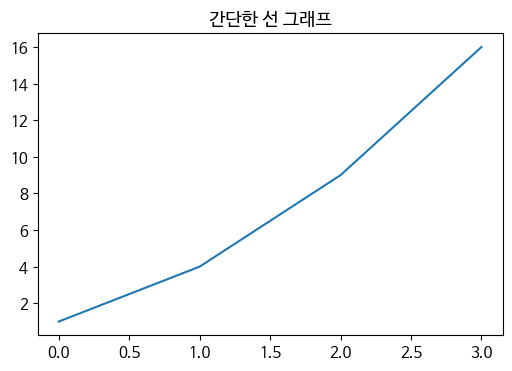

In [13]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [14]:
plt.rc('font', size=10)

## 년도별 출간도서의 산점도 그리기

In [15]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: 출판사, dtype: int64

In [16]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [17]:
top30_pubs_idx.sum()

51886

In [18]:
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


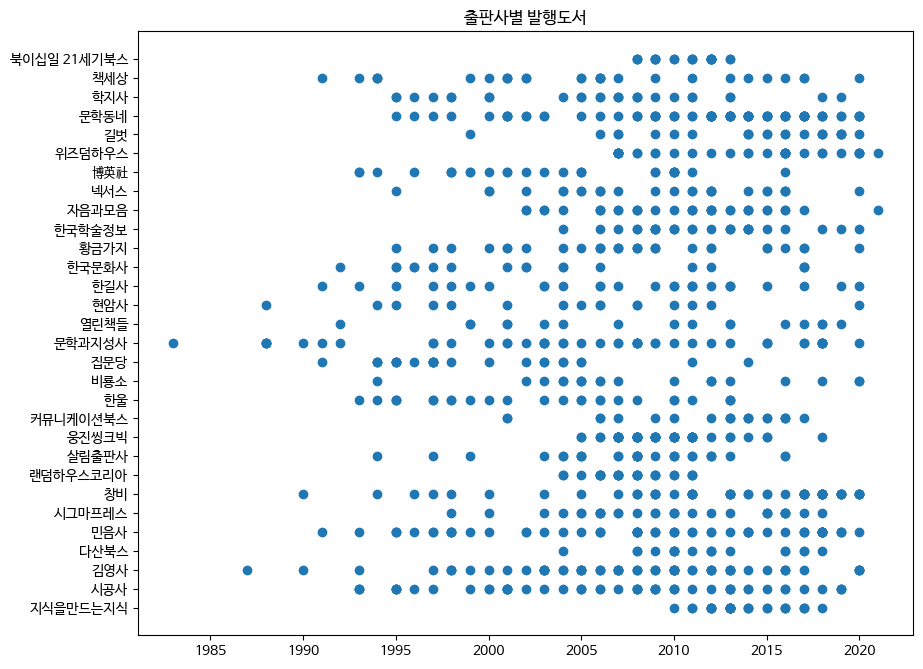

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행도서')
fig.show()

In [20]:
plt.rcParams['lines.markersize']

6.0

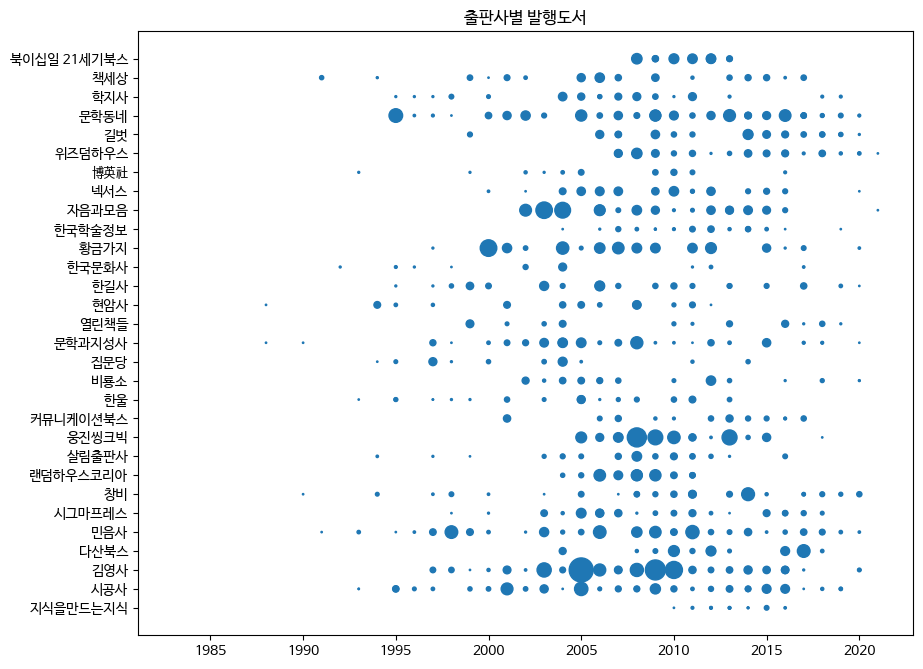

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

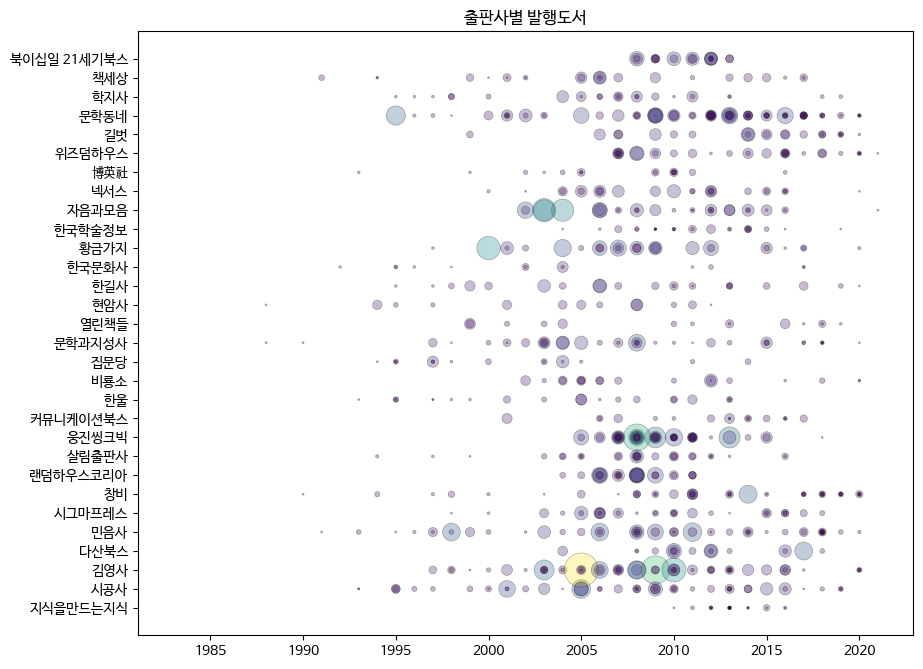

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], 
           linewidths=0.5, edgecolors='k', alpha=0.3,
           s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

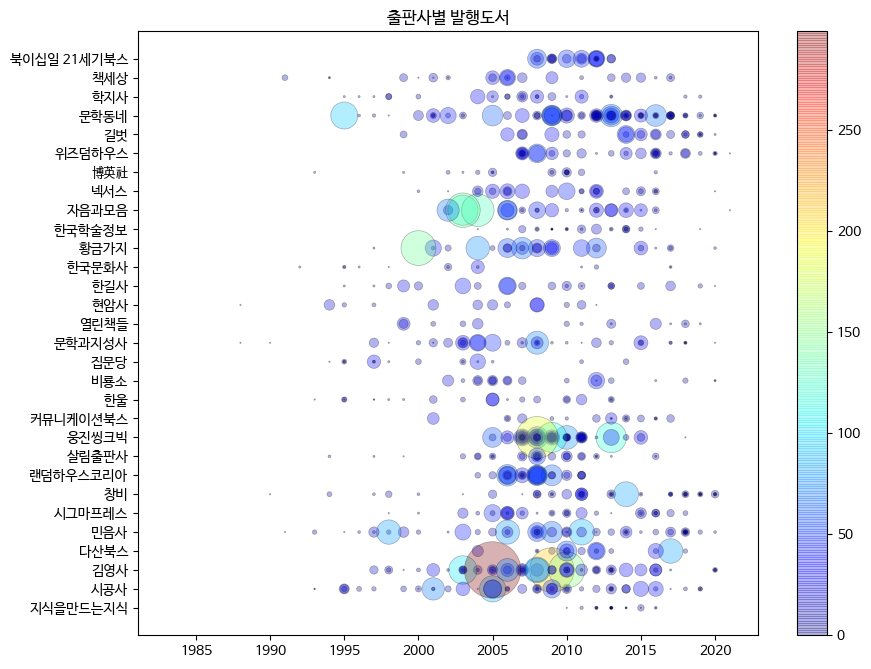

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], 
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet')
ax.set_title('출판사별 발행도서')
fig.colorbar(sc)
fig.show()

## 여러 개의 선 그래프 그리기

In [24]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum().reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [25]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

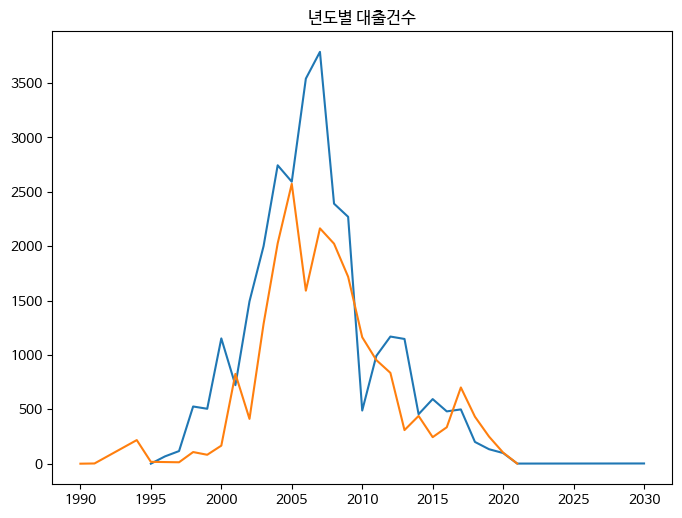

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

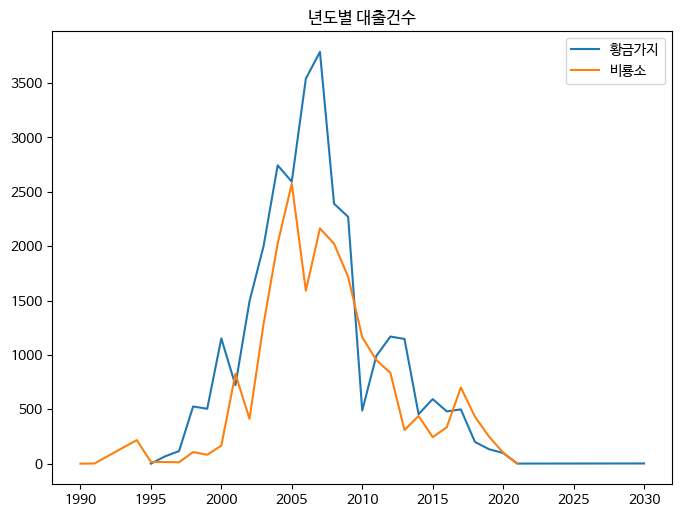

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

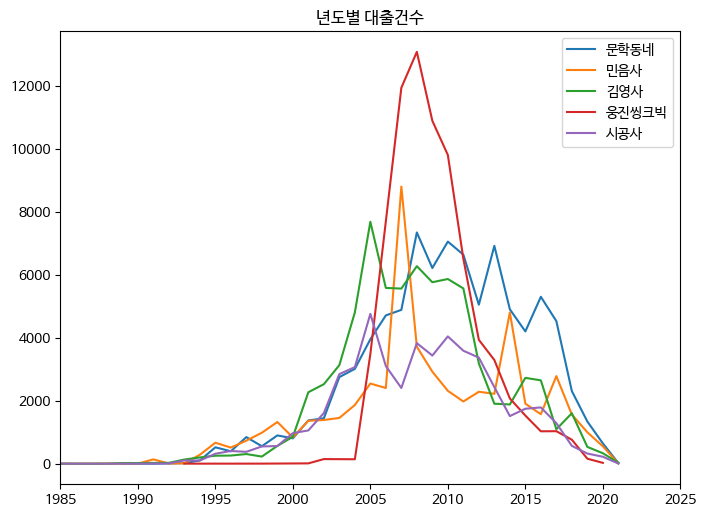

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

### 스택 영역 그래프 그리기

In [29]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [30]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

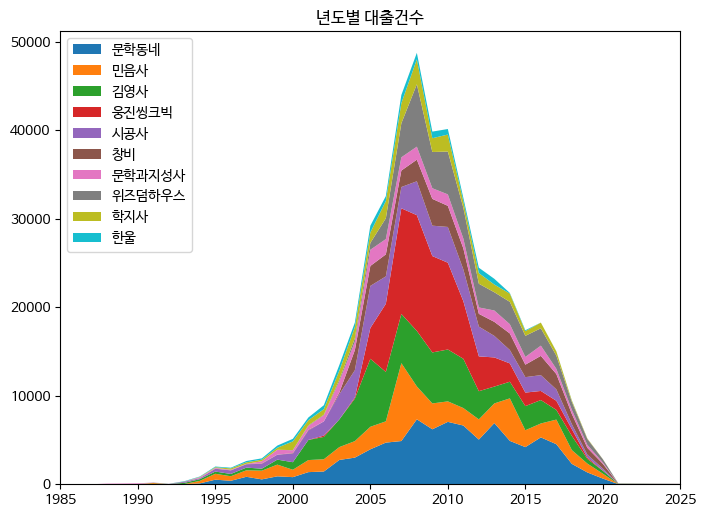

In [31]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

In [32]:
ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


In [33]:
ns_book11 = ns_book7[top30_pubs_idx].pivot_table(index='발행년도', columns='출판사', 
                                                 values='대출건수', aggfunc='sum')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


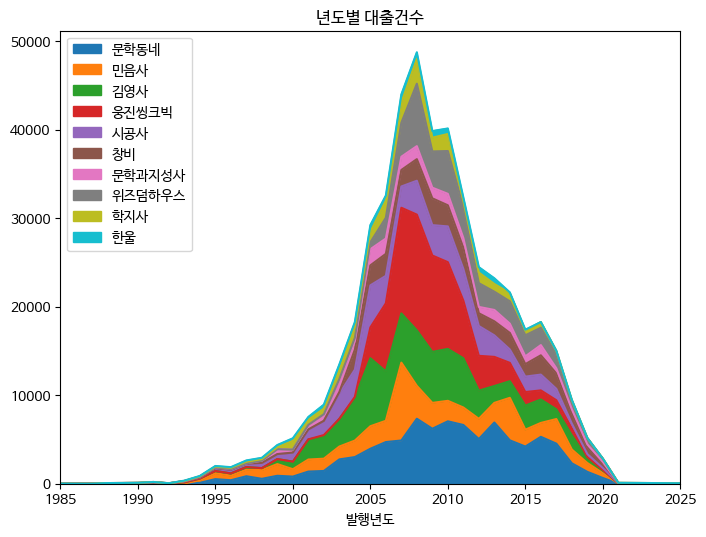

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11[top10_pubs].plot.area(ax=ax, title='년도별 대출건수',
                                xlim=(1985, 2025))
ax.legend(loc='upper left')
fig.show()

## 여러 개의 막대 그래프 그리기

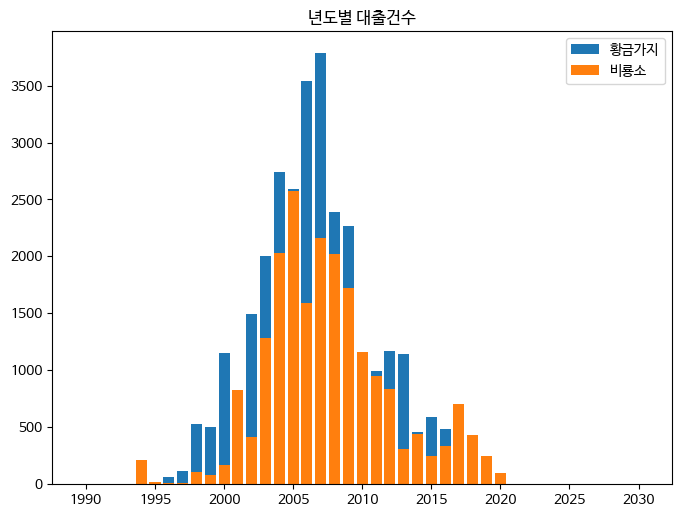

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

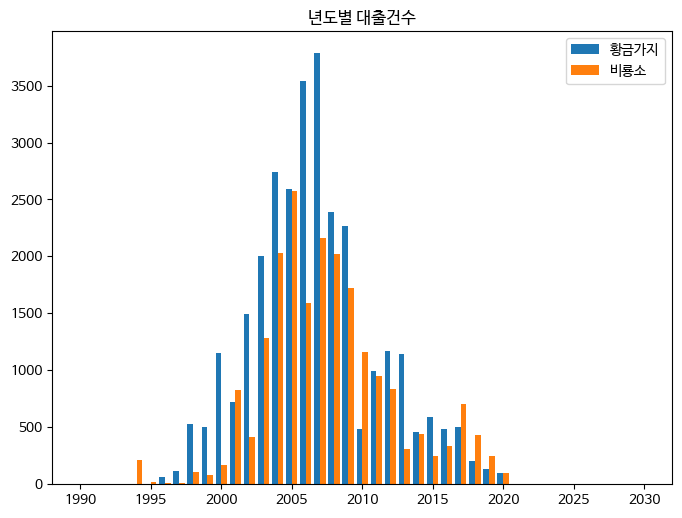

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

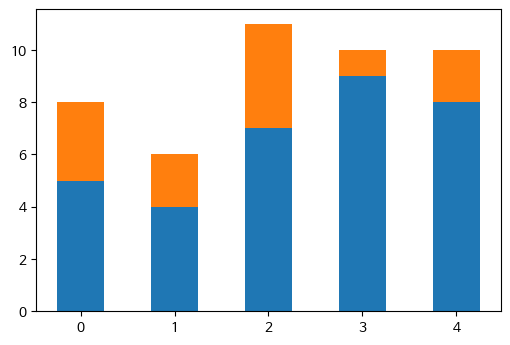

In [37]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

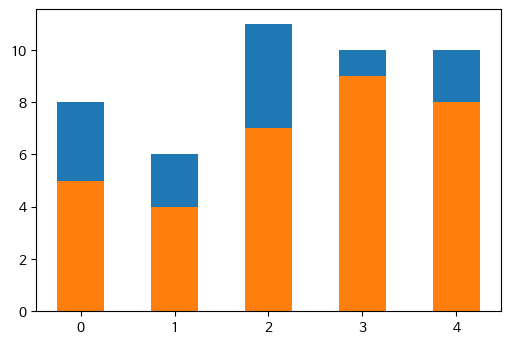

In [38]:
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

In [39]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [40]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [41]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()
ns_book12.head()

대출건수                                               ...           \
발행년도  1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...     2013   
문학동네   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   6919.0   
민음사    NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   9138.0   
김영사    NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  11043.0   
웅진씽크빅  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  14336.0   
시공사    NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  ...  16769.0   

                                                                              
발행년도      2014     2015     2016     2017    2018    2019    2020  2021 2030  
문학동네    4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0  18.0  NaN  
민음사     9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0  25.0  NaN  
김영사    11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0  55.0  NaN  
웅진씽크빅  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0   NaN  NaN  
시공사    15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0  60.0  NaN  

[5 rows x 50 columns]

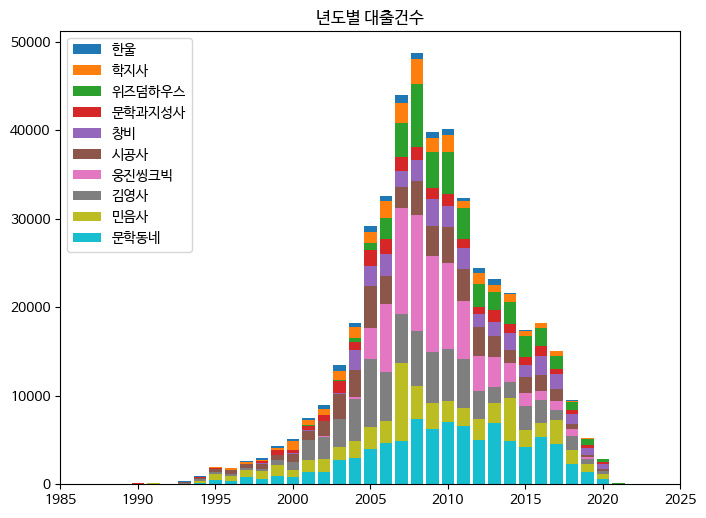

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    ax.bar(year_cols, bar, label=label)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

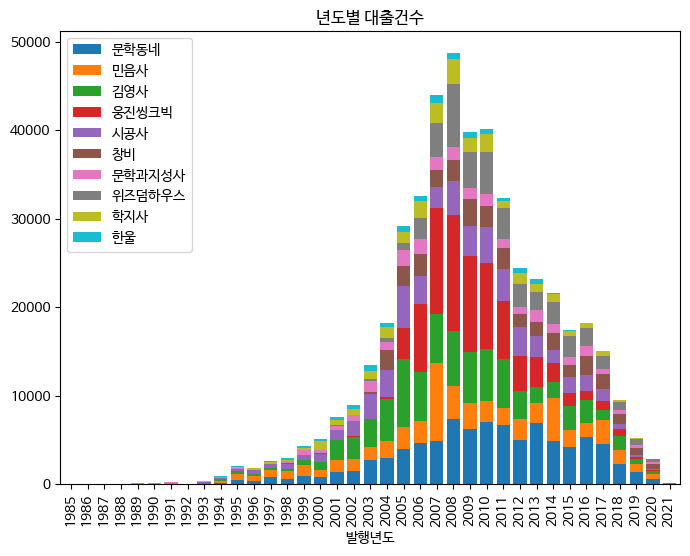

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(
    ax=ax, title='년도별 대출건수', stacked=True, width=0.8)
ax.legend(loc='upper left')
fig.show()

## 원 그래프 그리기

In [44]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

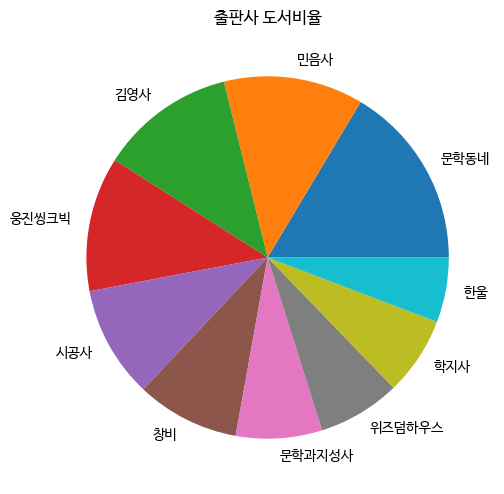

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')
fig.show()

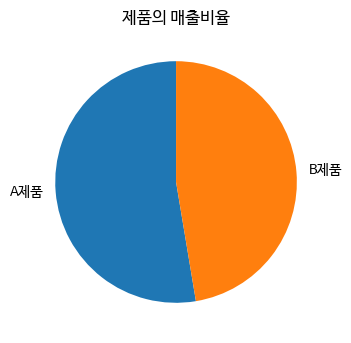

In [46]:
plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90)
plt.title('제품의 매출비율')
plt.show()

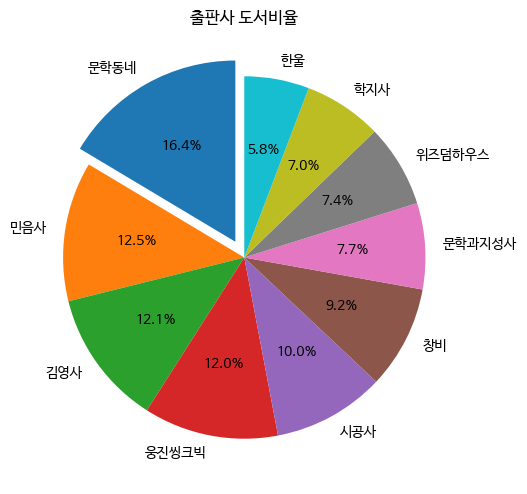

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90,
       autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서비율')
fig.show()

## 한 피겨에 여러 종류의 그래프 그리기

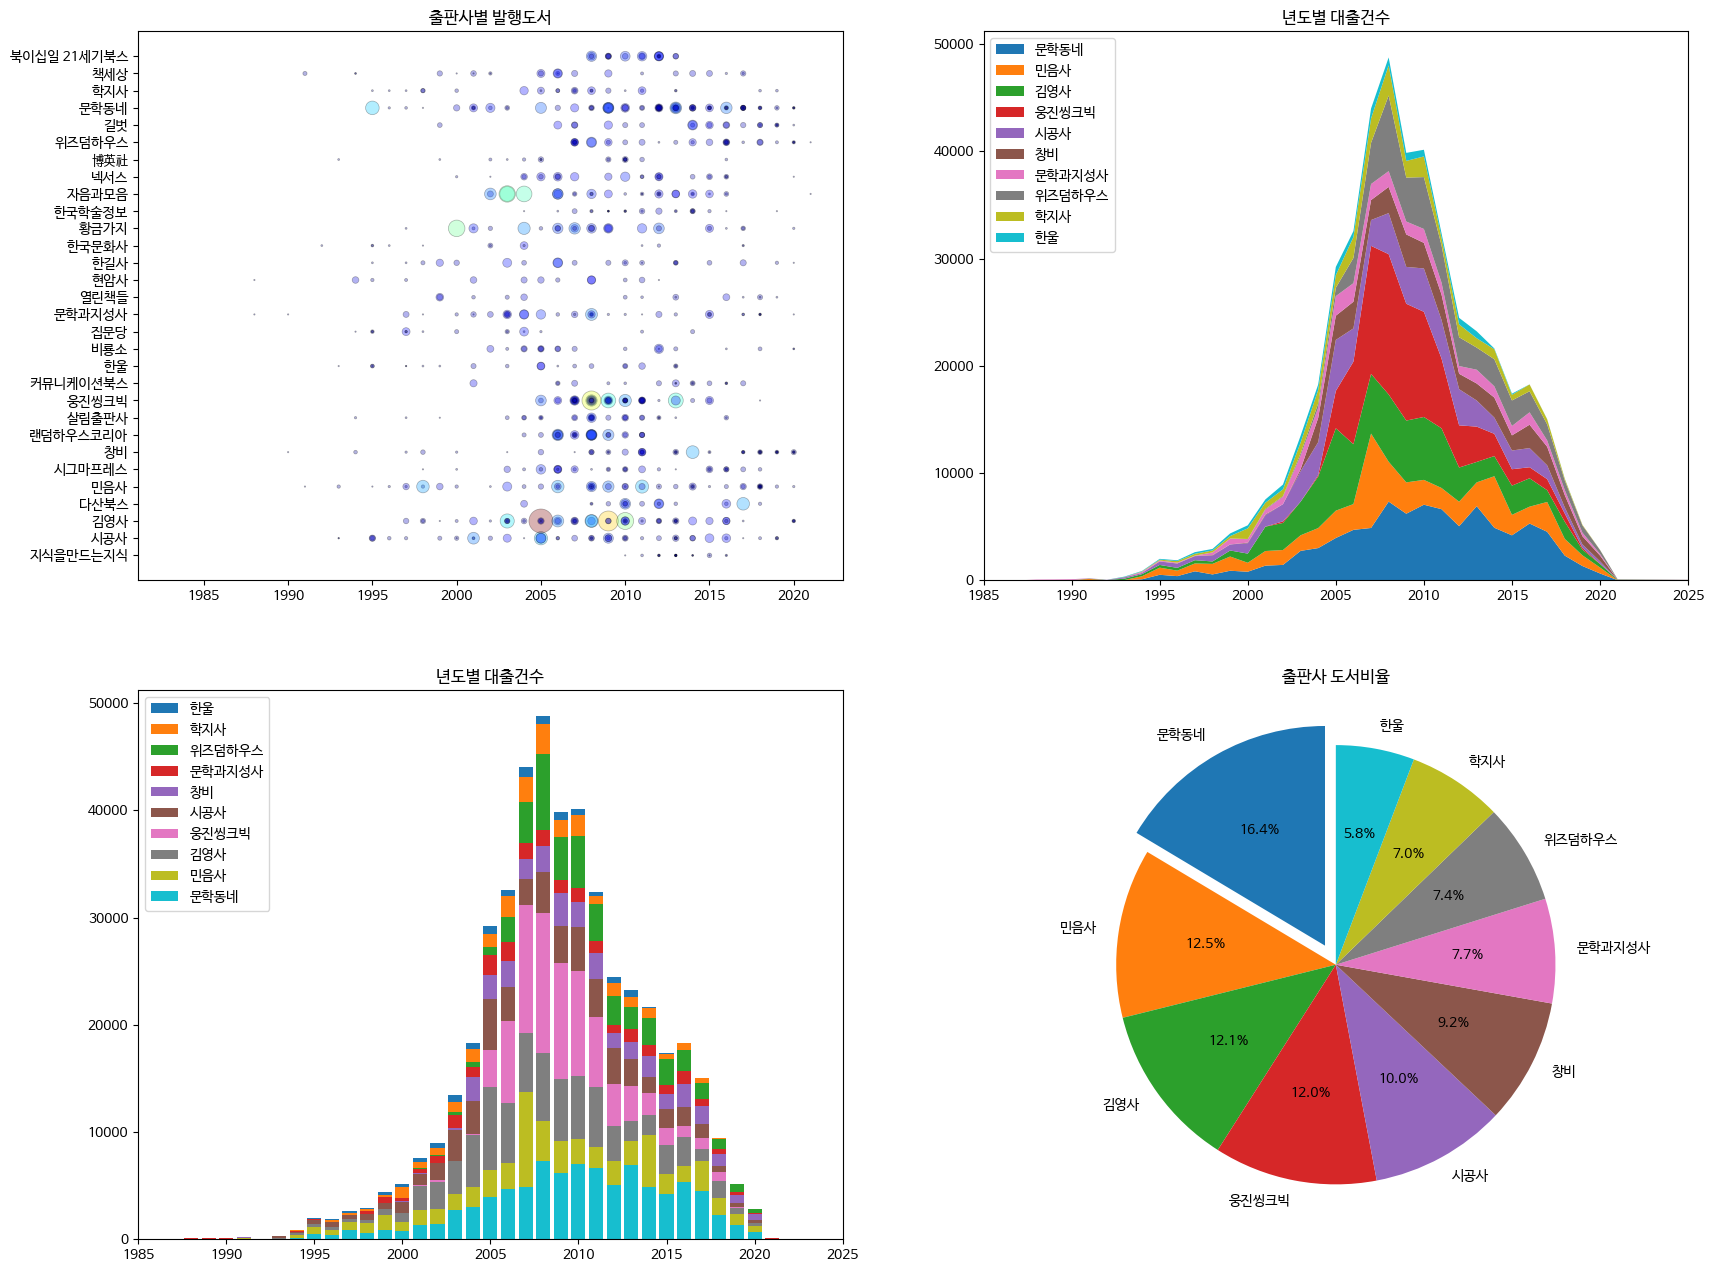

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], 
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행도서')

# 스택 선 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), 
                     labels=top10_pubs)
axes[0, 1].set_title('년도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('년도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서비율')

fig.show()